# Exercise 1.10

Consider the data in the file `CRMdata.txt` which represents weekly claims (in million pesos) in the last 20 years for a certain insurance product, one week per row. It is only data for those weeks were claims were filed. Fit a collective risk model and estimate the expected value, variance, median, and $\text{VaR}_{0.995}$ of the total claims per week.

In [21]:
# packages
using DataFrames, Distributions, Statistics, StatsBase, Plots, LaTeXStrings

### Read and prepare the data

In [22]:
f = open("CRMdata.txt")
rawdata = readlines(f)
close(f)
rawdata

262-element Vector{String}:
 "5.411,5.364,5.664,7.04,14.799"
 "8.106,5.883,17.226,14.412,6.183" ⋯ 171 bytes ⋯ "8.98,8.251,6.478,13.905,98.692"
 "286.733,11.04,6.381,6.904"
 "6.114"
 "6.299,5.401,11.72,10.037,13.997"
 "5.978"
 "11.318,9.102,5.061,5.317,5.156," ⋯ 56 bytes ⋯ "3,7.836,5.145,6.962,5.534,7.446"
 "5.867,5.442,9.412,30.613,70.7,6.442"
 "5.133"
 "6.366,5.036,7.455,8.951"
 ⋮
 "6.569"
 "5.105"
 "8.758"
 "5.138"
 "7.203"
 "6.115"
 "7.07"
 "20.94"
 "5.074"

In [23]:
nrows = length(rawdata)

262

In [24]:
rawdata[1]

"5.411,5.364,5.664,7.04,14.799"

In [25]:
split(rawdata[1], ",")

5-element Vector{SubString{String}}:
 "5.411"
 "5.364"
 "5.664"
 "7.04"
 "14.799"

In [26]:
parse.(Float64, split(rawdata[1], ","))

5-element Vector{Float64}:
  5.411
  5.364
  5.664
  7.04
 14.799

In [27]:
data = []

Any[]

In [28]:
for i ∈ 1:nrows
    push!(data, parse.(Float64, split(rawdata[i], ",")))
end
data

262-element Vector{Any}:
 [5.411, 5.364, 5.664, 7.04, 14.799]
 [8.106, 5.883, 17.226, 14.412, 6.183, 7.598, 7.29, 7.693, 9.129, 5.995  …  8.145, 5.683, 6.016, 19.812, 6.553, 8.98, 8.251, 6.478, 13.905, 98.692]
 [286.733, 11.04, 6.381, 6.904]
 [6.114]
 [6.299, 5.401, 11.72, 10.037, 13.997]
 [5.978]
 [11.318, 9.102, 5.061, 5.317, 5.156, 7.704, 6.89, 5.561, 5.301, 6.075, 8.248, 5.165, 6.25, 8.267, 9.433, 7.836, 5.145, 6.962, 5.534, 7.446]
 [5.867, 5.442, 9.412, 30.613, 70.7, 6.442]
 [5.133]
 [6.366, 5.036, 7.455, 8.951]
 ⋮
 [6.569]
 [5.105]
 [8.758]
 [5.138]
 [7.203]
 [6.115]
 [7.07]
 [20.94]
 [5.074]

### Frequency modeling

In [30]:
Nobs = length.(data) # observed frequency values → just for N > 0
println(Nobs)

[5, 38, 4, 1, 5, 1, 20, 6, 1, 4, 1, 5, 1, 1, 2, 1, 2, 1, 1, 9, 1, 4, 5, 1, 2, 2, 1, 1, 1, 2, 12, 1, 1, 2, 1, 1, 5, 3, 1, 2, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 3, 2, 2, 2, 4, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 5, 6, 1, 5, 1, 1, 1, 3, 2, 1, 4, 3, 2, 2, 1, 1, 1, 4, 4, 2, 2, 6, 3, 2, 33, 2, 14, 1, 3, 2, 1, 1, 2, 3, 2, 2, 1, 3, 1, 1, 1, 1, 4, 1, 3, 1, 4, 1, 2, 1, 2, 3, 4, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 17, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 33, 2, 1, 2, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 2, 1, 2, 2, 2, 9, 8, 1, 1, 3, 1, 1, 1, 2, 25, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 6, 1, 2, 1, 1, 2, 2, 3, 6, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [31]:
println(sort(unique(Nobs))) # unique observed values of frequency for N > 0

[1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 14, 17, 20, 25, 33, 38]


In [32]:
# Frequency table
Nvalues = collect(0:maximum(Nobs)) # we add zero to the possible values of N
Ncounts = zeros(Int, length(Nvalues))
Ncounts[1] = 52*20 - nrows # number of cases when N = 0 (no claims)
for n ∈ Nobs
    Ncounts[n+1] += 1 
end
Nprop = Ncounts ./ sum(Ncounts)
NfreqTable = DataFrame(value = Nvalues, counts = Ncounts, proportion = Nprop)

,value,counts,proportion
,Int64,Int64,Float64
1,0,778,0.748077
2,1,153,0.147115
3,2,53,0.0509615
4,3,17,0.0163462
5,4,12,0.0115385
6,5,7,0.00673077
7,6,6,0.00576923
8,7,2,0.00192308
9,8,1,0.000961538


In [33]:
sum(Ncounts), 52*20, sum(NfreqTable.proportion) # just checking

(1040, 1040, 1.0)

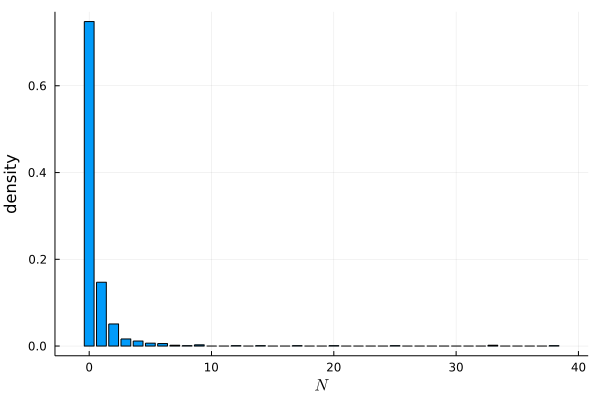

In [34]:
bar(Nvalues, Nprop, xlabel = L"N", ylabel = "density", legend = false)

When the estimated probability $\mathbb{P}(N=0)$ is significantly higher than for $N>0$ sometimes it is better to try fitting a model for $N|N>0.$ *To be continued...*

### Severity modeling

In [35]:
Yobs = zeros(0)
for i ∈ 1:nrows
    append!(Yobs, data[i])
end
println("∑ N_i = ", sum(Nobs))
Yobs # vector of claims in chronological order

∑ N_i = 670


670-element Vector{Float64}:
  5.411
  5.364
  5.664
  7.04
 14.799
  8.106
  5.883
 17.226
 14.412
  6.183
  ⋮
  6.569
  5.105
  8.758
  5.138
  7.203
  6.115
  7.07
 20.94
  5.074

Check for serial independence of $Y_1,Y_2,\ldots$

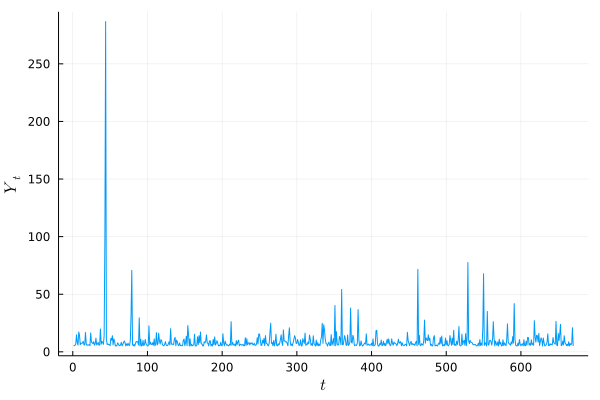

In [36]:
plot(Yobs, xlabel = L"t", ylabel = L"Y_t", legend = false)

For amounts of money a log-scale is preferred since vertical distances are proportional to % variations instead of absolute variations:

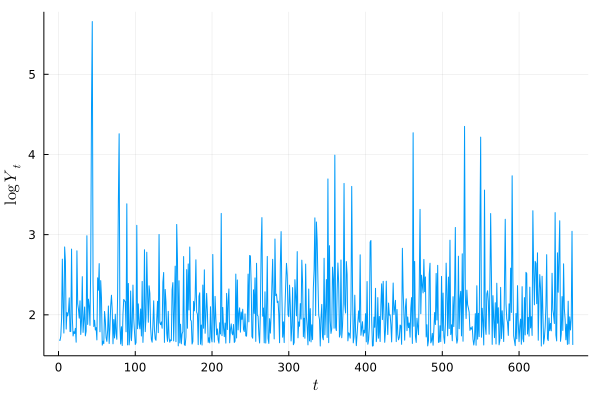

In [37]:
logYobs = log.(Yobs)
plot(logYobs, xlabel = L"t", ylabel = L"\log\,Y_t", legend = false)

Spearman = -0.00027283981672650856


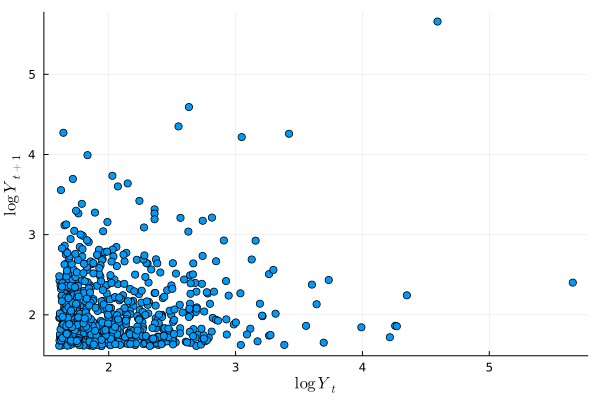

In [38]:
println("Spearman = ", corspearman(logYobs[1:(end-1)], logYobs[2:end])) # Spearman's correlation
scatter(logYobs[1:(end-1)], logYobs[2:end], xlabel = L"\log\,Y_t", ylabel = L"\log\,Y_{t+1}",
        legend = false)

A Spearman correlation close to zero does not necessarily imply independence between claims $Y_1,Y_2,\ldots$ so statistical procedures must be applied to verify. *To be continued...*

Check for possible dependence between claim severity and frequency:

In [39]:
avgYobs = zeros(nrows)
for i ∈ 1:nrows
    avgYobs[i] = mean(data[i])
end

Spearman = 0.44433139528796955


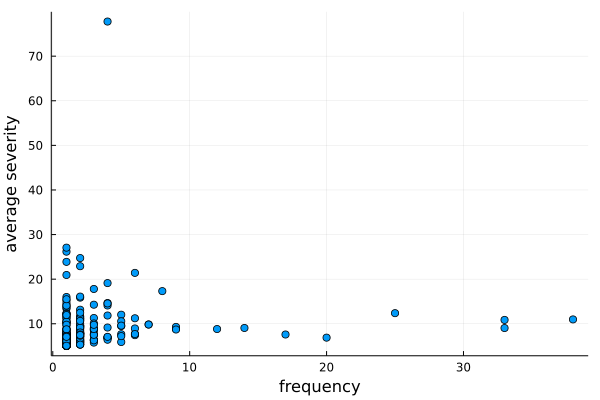

In [40]:
println("Spearman = ", corspearman(Nobs, avgYobs))
scatter(Nobs, avgYobs, legend = false, xlabel = "frequency", ylabel = "average severity")

The same as before but in log-scale:

Spearman = 0.44433139528796955


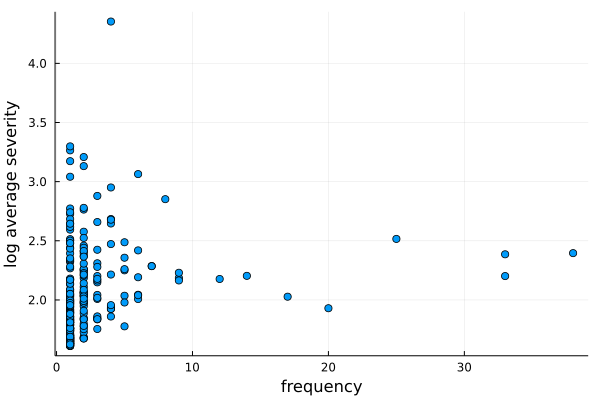

In [41]:
println("Spearman = ", corspearman(Nobs, log.(avgYobs)))
scatter(Nobs, log.(avgYobs), legend = false, xlabel = "frequency", ylabel = "log average severity")

Spearman's correlation clearly different from zero implies there is NO independence between frequency and severity, so in this case it is necessary to find a model for the severity conditional on the frequency. *To be continued...*